<a href="https://colab.research.google.com/github/Edwin10151/MachineLearning/blob/main/JunkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## JunkFood Classification
Identify whether the food is junk food or healthy food in the form of image

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import io
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
from random import shuffle
from sklearn.model_selection import train_test_split
from IPython.display import display, Image
from google.colab import drive


In [ ]:
print(tf.__version__)
print(hub.__version__)

2.5.0
0.12.0


In [ ]:
# Unzip JunkFood Zip File
!unzip 'drive/MyDrive/JunkFoodClassification/junkfood.zip' -d 'drive/MyDrive/JunkFoodClassification/JunkFood'
!unzip 'drive/MyDrive/JunkFoodClassification/junkfood2.zip' -d 'drive/MyDrive/JunkFoodClassification/JunkFood'
!unzip 'drive/MyDrive/JunkFoodClassification/junkfood3.zip' -d 'drive/MyDrive/JunkFoodClassification/JunkFood'
!unzip 'drive/MyDrive/JunkFoodClassification/junkfood4.zip' -d 'drive/MyDrive/JunkFoodClassification/JunkFood'
# Unzip Healthy Food Zip File
!unzip 'drive/MyDrive/JunkFoodClassification/healthyfood.zip' -d 'drive/MyDrive/JunkFoodClassification/HealthyFood'
!unzip 'drive/MyDrive/JunkFoodClassification/healthyfood2.zip' -d 'drive/MyDrive/JunkFoodClassification/HealthyFood'
!unzip 'drive/MyDrive/JunkFoodClassification/healthy3.zip' -d 'drive/MyDrive/JunkFoodClassification/HealthyFood'

Archive:  drive/MyDrive/JunkFoodClassification/junkfood.zip
replace drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627731654015.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  drive/MyDrive/JunkFoodClassification/junkfood2.zip
replace drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627732443379.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  drive/MyDrive/JunkFoodClassification/junkfood3.zip
replace drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627734091490.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  drive/MyDrive/JunkFoodClassification/junkfood4.zip
replace drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627737603584.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  drive/MyDrive/JunkFoodClassification/healthyfood.zip
Archive:  drive/MyDrive/JunkFoodClassification/healthyfood2.zip
replace drive/MyDrive/JunkFoodClassification/HealthyFood/HelloIMG1627734467495.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip 'drive/MyDrive/JunkFoodClassification/junkfood5.zip' -d 'drive/MyDrive/JunkFoodClassification/JunkFood'
!unzip 'drive/MyDrive/JunkFoodClassification/healthyfood4.zip' -d 'drive/MyDrive/JunkFoodClassification/HealthyFood'

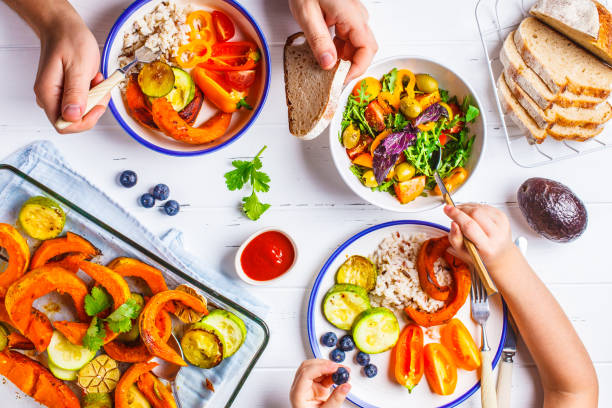

In [ ]:
#View an image 
Image('drive/MyDrive/JunkFoodClassification/HealthyFood/HelloIMG1627738279448.jpeg')

##Preprocessing Images(turning images into Tensors)
To preprocess our images into Tensor we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpeg) into Tensors
4. Normalize our image(convert color channel values from 0-255 to 0-1)
5. Resize the iamge to be a shape of (224,224)
6. Return the modified image

In [ ]:
JunkFoodList = ["drive/MyDrive/JunkFoodClassification/JunkFood/" + images for images in tqdm(os.listdir("drive/MyDrive/JunkFoodClassification/JunkFood"))]
HealthyFoodList = ["drive/MyDrive/JunkFoodClassification/HealthyFood/" + images for images in tqdm(os.listdir("drive/MyDrive/JunkFoodClassification/HealthyFood"))]
JunkFoodList[:10]

100%|██████████| 185/185 [00:00<00:00, 63090.19it/s]


['drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627731654015.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627731658360.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627731661722.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627731776927.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627731976131.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627732072863.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627732092209.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627732098646.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627732102286.jpeg',
 'drive/MyDrive/JunkFoodClassification/JunkFood/HelloIMG1627732119294.jpeg']

In [ ]:
print(len(JunkFoodList))
print(len(HealthyFoodList))

182
185


In [ ]:
IMG_SIZE=224
X = []
y = []
image_list = [JunkFoodList, HealthyFoodList]
for each_list in image_list:
  category_index = image_list.index(each_list) # (0,1)
  for image_set in tqdm(each_list):
    image = tf.io.read_file(image_set)
    image = tf.io.decode_jpeg(image, channels = 3) # RGB
    image = tf.image.convert_image_dtype(image,tf.float32)
    image = tf.image.resize(image, size =[IMG_SIZE, IMG_SIZE])
    X.append(image)
    y.append(category_index)
X[:1], y[:1]

100%|██████████| 185/185 [00:04<00:00, 42.93it/s]


([<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
  array([[[0.6191677 , 0.9590037 , 0.9732694 ],
          [0.67178875, 0.9728092 , 0.9915767 ],
          [0.6033214 , 0.93581444, 0.9606043 ],
          ...,
          [0.69857967, 0.96048415, 0.98401356],
          [0.72843057, 0.95924294, 0.9682065 ],
          [0.6542621 , 0.9539818 , 0.96364576]],
  
         [[0.64659864, 0.9413366 , 0.9601041 ],
          [0.66718686, 0.9445979 , 0.9521809 ],
          [0.63539416, 0.9406963 , 0.9559624 ],
          ...,
          [0.7020208 , 0.97332966, 0.99257725],
          [0.6829326 , 0.97088784, 0.9675265 ],
          [0.6887155 , 0.96022415, 0.97937185]],
  
         [[0.6847339 , 0.9580833 , 0.98205286],
          [0.66604644, 0.93271315, 0.9366347 ],
          [0.6636055 , 0.934754  , 0.9442778 ],
          ...,
          [0.66794634, 0.943597  , 0.95119995],
          [0.64783925, 0.96470594, 0.9686275 ],
          [0.6932573 , 0.9613247 , 0.97238904]],
  
         ...,
  
     

In [ ]:
len(X), len(y)

(367, 367)

In [ ]:
NUM_IMAGES = 110#@param{type:"slider", min:100,max :1000, step:100}

In [ ]:
# Split the images into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.35, random_state = 42)

In [ ]:
len(X_train), len(X_val), len(y_train), len(y_val)

(238, 129, 238, 129)

In [ ]:
print(y_train)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]


In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.batch(32)
validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(32)

In [ ]:
len(train), len(validation)

(8, 5)

TypeError: ignored

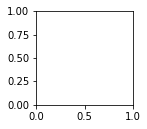

In [ ]:
def show_25_images(images, label_set):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(label_set[i])
    # Turn gird lines off
    plt.axis("off")
show_25_images(X_train, y_train)

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, colour channels

# setup output shpae of our model
OUTPUT_SHAPE = 1

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL, input_shape = INPUT_SHAPE), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="sigmoid") # Layer 2 (output layer)
  ])
  # Compile the model

  # # Build the model
  # model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [ ]:
model = create_model()
model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
  optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
  metrics=["accuracy"] # We'd like this to go up
)
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_17 (KerasLayer)  (None, 1001)              5432713   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1002      
Total params: 5,433,715
Trainable params: 1,002
Non-trainable params: 5,432,713
_________________________________________________________________


##Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which help track our models progress and another for early stopping which prevents our model from training for too long.

##TensorBoard Callback
To setup a TensorBoard callback, we need to do three things

Load the TensorBoard notebook extension
Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function
Visualize our models training logs iwth the %tensorboard magic function

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# Create a function to build a TensorBoard Callback
def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/JunkFoodClassification/log",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

##Early Stopping Callback
Stop model from overfitting by stopping traniing if a certain evaluation metric stops improving

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience  = 3)

In [ ]:
NUM_EPOCHS = 60 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
len(X_train), len(X_val), len(y_train), len(y_val)

(8, 1, 1, 1)

(367,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(INPUT_SHAPE) 

model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 256)     7168      
_________________________________________________________________
activation_21 (Activation)   (None, 222, 222, 256)     0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 256)     590080    
_________________________________________________________________
activation_22 (Activation)   (None, 109, 109, 256)     0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 256)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 746496)          

In [ ]:
tensorboard = create_tensorboard_callback()

# Fit the model to the data passing it the callbacks we created
model.fit(x= train,
          epochs=NUM_EPOCHS,
          validation_data= validation)
            # validation_freq=1, # check validation metrics every epoch
            # callbacks=[tensorboard, early_stopping])

Epoch 1/60
8/8 [==============================] - 19s 2s/step - loss: 0.8991 - accuracy: 0.5210 - val_loss: 0.6275 - val_accuracy: 0.6434
Epoch 2/60
8/8 [==============================] - 14s 2s/step - loss: 0.5328 - accuracy: 0.7311 - val_loss: 0.4395 - val_accuracy: 0.7752
Epoch 3/60
8/8 [==============================] - 15s 2s/step - loss: 0.3545 - accuracy: 0.8487 - val_loss: 0.3485 - val_accuracy: 0.8372
Epoch 4/60
8/8 [==============================] - 15s 2s/step - loss: 0.2579 - accuracy: 0.8950 - val_loss: 0.3039 - val_accuracy: 0.8760
Epoch 5/60
8/8 [==============================] - 15s 2s/step - loss: 0.2011 - accuracy: 0.9328 - val_loss: 0.2794 - val_accuracy: 0.8915
Epoch 6/60
8/8 [==============================] - 15s 2s/step - loss: 0.1653 - accuracy: 0.9664 - val_loss: 0.2605 - val_accuracy: 0.8992
Epoch 7/60
8/8 [==============================] - 15s 2s/step - loss: 0.1394 - accuracy: 0.9706 - val_loss: 0.2454 - val_accuracy: 0.8992
Epoch 8/60
8/8 [==================